# Machine Learning – Assignment I
## All about supervised learning
#### RE6124035 數據所 黃亮臻

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from platform import python_version

import sklearn

from importlib import reload
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

print("【Python】{}".format(python_version()))
print("【Pandas】{}".format(pd.__version__))
print("【NumPy】{}".format(np.__version__))
print("【SHAP】{}".format(shap.__version__))
print("【Matplotlib】{}".format(mpl.__version__))
print("【Scikit-learn】{}".format(sklearn.__version__))

【Python】3.11.5
【Pandas】2.0.3
【NumPy】1.24.3
【SHAP】0.43.0
【Matplotlib】3.7.2
【Scikit-learn】1.3.0


In [3]:
data = pd.read_csv('/Users/liang/Documents/NCKU_DS/ML/hw1/train.csv')
data = data.drop(["policy_id"],axis=1)
print(data.shape)

data.head()

(58592, 43)


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
# 分離 label
data_y = data['is_claim']
data_X = data.drop('is_claim', axis=1)
        
print(data_X.shape)
print(data_y.shape)


# 將類別變數做 label encoder
cat_col = data_X.columns.difference(data_X._get_numeric_data().columns)
print(len(cat_col))
labelencoder = LabelEncoder()
data_XX = data_X.copy()
for i in cat_col:
    data_XX[i] = labelencoder.fit_transform(data_X[i])
    
print(data_XX.shape)    

(58592, 42)
(58592,)
27
(58592, 42)


In [5]:
# y=1 的數量
print(data_y.sum())
print(data_y.sum()/data_XX.shape[0])

3748
0.06396777717094485


In [6]:
def train_test_split(data_X, data_y, test_ratio=0.2, seed = None):
    '''
    Args:
        data
        test_ratio: (default=0.2), 
        seed: (default=None)
        
    Returns:
        train, test
    '''
    if seed:
        np.random.seed(seed)
        
    indice = list(range(data.shape[0]))
    np.random.shuffle(indice)
    split_index = int(data.shape[0]*(1-test_ratio))
    train_idx, test_idx = indice[:split_index], indice[split_index:]
    
    X_train, X_test = data_X.iloc[train_idx, :], data_X.iloc[test_idx, :]  
    y_train, y_test = data_y[train_idx], data_y[test_idx]  
    
    return X_train, X_test, y_train, y_test

In [7]:
# 將資料切分為訓練集 & 測試集
X_train, X_test, y_train, y_test = train_test_split(data_XX, data_y)


# 將 input 資料轉成 array 型態
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(46873, 42)
(11719, 42)
46873
11719


---

# Classification Task

In [9]:
# 載入分類模組
import model
reload(model) 

<module 'model' from '/Users/liang/Documents/NCKU_DS/ML/hw1/gar/model.py'>

### 1. Linear Classifier

In [10]:
%%time
linear = model.LinearClassifier(epoch = 200)
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, linear_pred))
print("f1 score: ", f1_score(y_test, linear_pred, average="macro"))

Accuracy:  0.93625735984299
f1 score:  0.4835397294081354
CPU times: user 57 s, sys: 496 ms, total: 57.5 s
Wall time: 57.5 s


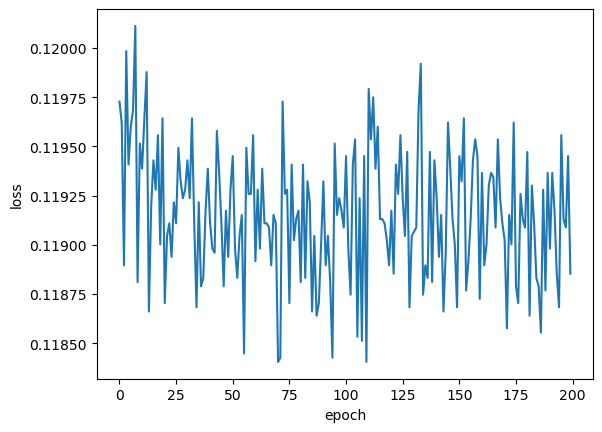

In [11]:
plt.plot(range(200), linear.get_loss())
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('figures/loss_linear.png', dpi=300, bbox_inches='tight')

### 2. K-NN Classifier

In [12]:
%%time
knn = model.KnnClassifier(k = 5, metrics='euclidean')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, knn_pred))
print("f1 score: ", f1_score(y_test, knn_pred, average="macro"))

Accuracy:  0.9338680774810137
f1 score:  0.4854660215719343
CPU times: user 1min 8s, sys: 944 ms, total: 1min 9s
Wall time: 1min 9s


### 3. Naïve Decision Tree Classifier

In [13]:
%%time
naiveDT = model.NaiveDTClassifier()
naiveDT.fit(X_train, y_train)
ndt_pred = naiveDT.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, ndt_pred))
print("f1 score: ", f1_score(y_test, ndt_pred, average="macro"))

Accuracy:  0.8699547742981483
f1 score:  0.5076179654297875
CPU times: user 22.5 s, sys: 176 ms, total: 22.7 s
Wall time: 22.6 s


### 4. Decision Tree with Pruning

In [14]:
%%time
PrunedDT = model.PrunedDTClassifier(measure='gini', max_depth=10, min_samples_split=2)
PrunedDT.fit(X_train, y_train)
pdt_pred = PrunedDT.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pdt_pred))
print("f1 score: ", f1_score(y_test, pdt_pred, average="macro"))

Accuracy:  0.9325027732741702
f1 score:  0.48753640491358047
CPU times: user 4.31 s, sys: 27.7 ms, total: 4.34 s
Wall time: 4.35 s


---

# Feature engineering

#### 1. Implement an algorithm that can determine the "feature importance" for both linear classifiers and decision trees. Explain the rationale behind your chosen algorithm.

In [49]:
# feature importance plot
def featureplot(importance, ylabel, title, k):
    '''
    importance: list
    ylabel: 圖的y軸名稱 (str)
    title: 圖的title名稱 (str)
    k: print importance最大的十個變數
    '''

    fig= plt.figure(figsize= [10, 4])
    plt.bar(x = range(len(importance)), height = importance)
    
    sorted_indices = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)
    tick_loc = sorted_indices[:k]
    plt.xticks(tick_loc, tick_loc)

    plt.xlabel('variable', size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title(f'Feature importance of {title}', size = 16)
    print(f'importance 最大的{k}個變數: ', [data_X.columns[i] for i in tick_loc])
    
    plt.savefig(f'figures/{title}_importance.png', dpi=300, bbox_inches='tight')
    
    return tick_loc

importance 最大的10個變數:  ['area_cluster', 'policy_tenure', 'length', 'width', 'max_torque', 'max_power', 'population_density', 'displacement', 'ncap_rating', 'model']


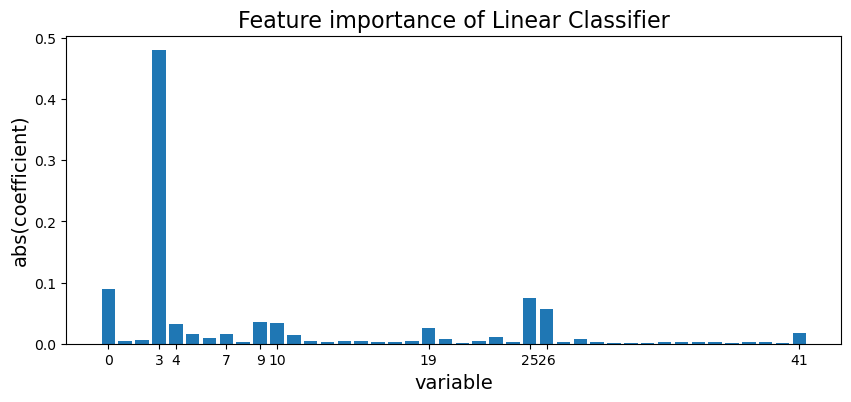

In [18]:
# Linear Classifier
# 將 coefficient 縮到 0, 1之間 作為 importance
abssum = np.sum([abs(coef) for coef in linear.get_coefficient()])
importance = [abs(coef)/abssum for coef in linear.get_coefficient()]
f_idx_linear = featureplot(importance, 'abs(coefficient)', 'Linear Classifier', 10)

importance 最大的10個變數:  ['policy_tenure', 'age_of_policyholder', 'age_of_car', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'engine_type', 'fuel_type']


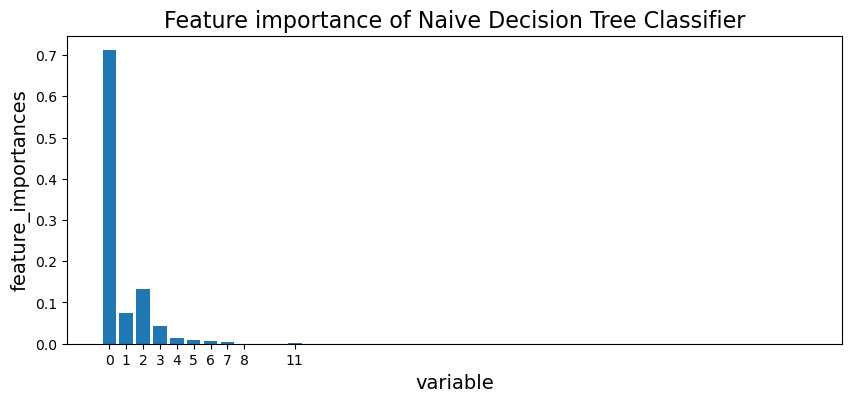

In [19]:
# Naive decision trees
f_idx_naive = featureplot(naiveDT.get_feature_importances(), 'feature_importances', 'Naive Decision Tree Classifier', 10)

importance 最大的10個變數:  ['policy_tenure', 'age_of_policyholder', 'age_of_car', 'area_cluster', 'population_density', 'model', 'make', 'segment', 'engine_type', 'gross_weight']


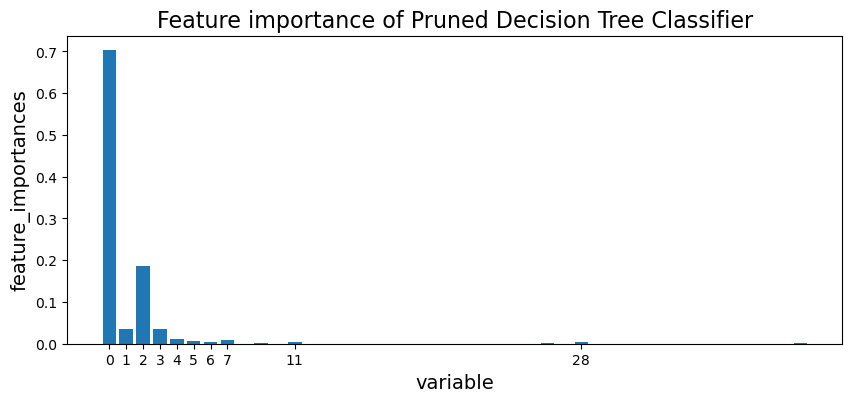

In [20]:
# Pruned decision trees
f_idx_prune = featureplot(PrunedDT.get_feature_importances(), 'feature_importances', 'Pruned Decision Tree Classifier', 10)

#### 2. Utilize SHAP (https://shap.readthedocs.io/en/latest/) with your implemented algorithm to assess feature importance. Compare your findings with those obtained using SHAP.

參考資料:
1. [用 SHAP 可视化解释机器学习模型的输出实用指南](https://zhuanlan.zhihu.com/p/441302127)  
2. chatGPT:
- `shap.Explainer(clf)`  
這種用法直接傳遞了一個訓練好的模型（clf），比如 scikit-learn 的模型，shap 將自動確定如何調用這個模型來獲取預測值。
如果 clf 是一個兼容的模型，shap 將會使用它的 predict 方法。  

- `shap.Explainer(clf.predict, X_train)`   
這種用法傳遞了一個函數（在這裡是 clf.predict），它接受輸入數據並返回模型的預測。
這種方式可以自定義輸入到預測函數的數據。比如，如果你有一個複雜的管道或預處理步驟，你可以將它們包裝到一個函數中，然後傳遞該函數給 shap.Explainer。
第二個參數 X_train 在這裡是可選的，它提供了一組代表性數據，幫助 shap 更好地估計 Shapley 值。    
  
  兩者的主要區別在於第二種方法可以讓你更精確地控制模型預測的過程。在某些情況下，如果你的模型有特殊的預處理或者後處理需求，可能需要使用第二種方法。如果模型是標準的並且與 SHAP 兼容，那麼使用第一種，直接傳遞模型實例通常是最簡單的選擇。

In [21]:
%%time
explainer = shap.Explainer(PrunedDT.predict, X_train)
explainer.feature_names = data_X.columns
shap_values = explainer(X_train)

PermutationExplainer explainer: 46874it [1:07:42, 11.52it/s]                           


CPU times: user 1h 7min 17s, sys: 27.1 s, total: 1h 7min 44s
Wall time: 1h 7min 43s


importance 最大的10個變數:  ['age_of_car', 'policy_tenure', 'population_density', 'area_cluster', 'model', 'age_of_policyholder', 'segment', 'fuel_type', 'gross_weight', 'make']


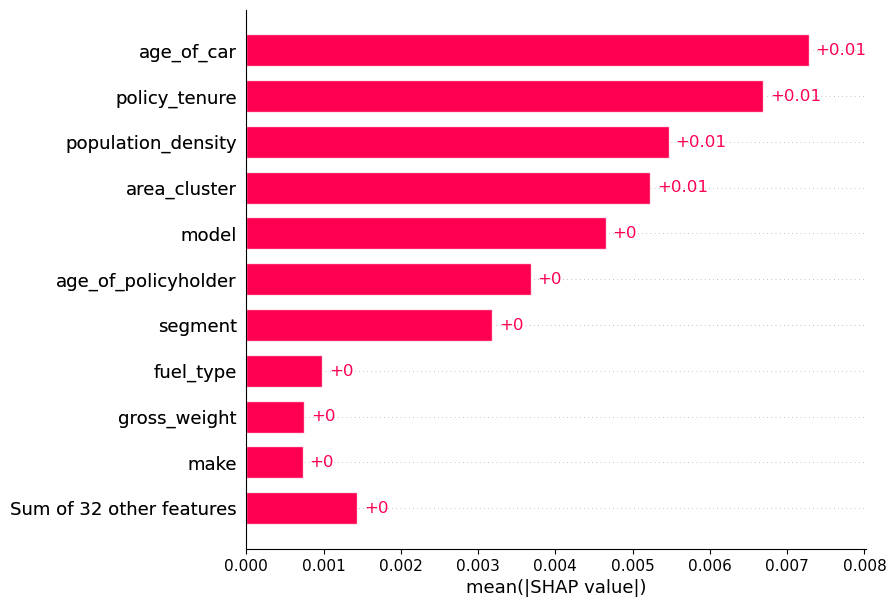

In [50]:
# bar plot: 平均影響力的絕對值 (取最重要的十個變數)
shap.plots.bar(shap_values, max_display=11, show=False)
plt.savefig(f'figures/shap_bar.png', dpi=300, bbox_inches='tight')

shap_sum = np.abs(shap_values.values).mean(axis=0)

k = 10
shap_indices = np.argsort(shap_sum)[::-1][:k].tolist()
shap_features10 = [explainer.feature_names[i] for i in shap_indices]
print('importance 最大的10個變數: ', shap_features10)

#### 3. It is known that sometimes the original feature set may not be effective. Designing new features based on the original set is crucial for model performance. Based on your observations and experience, propose an algorithm that can derive new features to enhance model accuracy.

In [24]:
# 將以上模型與 shap 得出的前十名 importance 取聯集, 共有17個變數
union_importance = list(set(f_idx_linear + f_idx_naive + f_idx_prune + shap_indices))

In [25]:
X_train_new = X_train[:, union_importance]
X_test_new = X_test[:, union_importance]
print(X_train_new.shape)
print(X_test_new.shape)

(46873, 17)
(11719, 17)


In [26]:
%%time

# linear
linear = model.LinearClassifier(epoch = 200)
linear.fit(X_train_new, y_train)
linear_pred = linear.predict(X_test_new)
print('linear:')
print("Accuracy: ", accuracy_score(y_test, linear_pred))
print("f1 score: ", f1_score(y_test, linear_pred, average="macro"))


# knn
knn = model.KnnClassifier(k = 5, metrics='euclidean')
knn.fit(X_train_new, y_train)
knn_pred = knn.predict(X_test_new)
print('\nknn:')
print("Accuracy: ", accuracy_score(y_test, knn_pred))
print("f1 score: ", f1_score(y_test, knn_pred, average="macro"))


# Naïve Decision Tree Classifier
naiveDT = model.NaiveDTClassifier()
naiveDT.fit(X_train_new, y_train)
ndt_pred = naiveDT.predict(X_test_new)
print('\nNaïve Decision Tree Classifier:')
print("Accuracy: ", accuracy_score(y_test, ndt_pred))
print("f1 score: ", f1_score(y_test, ndt_pred, average="macro"))


# Decision Tree with Pruning
PrunedDT = model.PrunedDTClassifier(measure='gini', max_depth=10, min_samples_split=2)
PrunedDT.fit(X_train_new, y_train)
pdt_pred = PrunedDT.predict(X_test_new)
print('\nDecision Tree with Pruning:')
print("Accuracy: ", accuracy_score(y_test, pdt_pred))
print("f1 score: ", f1_score(y_test, pdt_pred, average="macro"))

linear:
Accuracy:  0.93625735984299
f1 score:  0.4835397294081354

knn:
Accuracy:  0.9339534089939414
f1 score:  0.4867660938232039

Naïve Decision Tree Classifier:
Accuracy:  0.8705520948886424
f1 score:  0.5035429317924996

Decision Tree with Pruning:
Accuracy:  0.9319054526836761
f1 score:  0.4873328745964124
CPU times: user 2min 9s, sys: 579 ms, total: 2min 10s
Wall time: 2min 10s


---

# Cross-Validation

#### 1. set k=3,5,10, and make some discussions of your observation.

#### 2. Now you have a test dataset you have partitioned from train.csv. Please design an algorithm that can merge/aggregate the predicted results from k classifiers in k- fold cross-validation. Compare the performance and complexity of the cross- validation with Problem 1.

#### 3. How do we know the performance of one model is really better than another one? Please compare the result in 5-fold cross-validation and the result of Problem 1 to justify which is “REALLY” better. Also show me why.

In [27]:
def cross_validation_with_loss(model, X_train, y_train, X_test, y_test, k=5, shuffle=True, random_state=None):
    """
    Perform k-fold cross-validation on a custom model, including training and validation loss.

    Parameters:
    - model: The model object, must have fit, predict, and loss methods.
    - X_train: The feature dataset, should be in shape (number of samples, number of features).
    - y_train: The label dataset, should be in shape (number of samples,).
    - k: Number of folds, default is 5.
    - shuffle: Whether to shuffle data before splitting, default is True.
    - random_state: Seed for the random number generator.

    Returns:
    - accuracy_list: accuracy on each fold.
    - f1macro_list: F1 score on each fold.
    - accuracy_list_test: testing accuracy on each fold.
    - f1macro_list_test: testing F1 score on each fold.
    - train_losses: A list of training losses for each fold.
    - valid_losses: A list of validation losses for each fold.
    """
    
    kf = KFold(n_splits=k, shuffle=shuffle, random_state=random_state)
    training_losses = []
    validation_losses = []
    accuracy_list = []
    f1macro_list = []
    accuracy_list_test = []
    f1macro_list_test = []

    
    for train_index, test_index in kf.split(X_train):
        # Split the dataset
        X_train_cut, X_valid = X_train[train_index], X_train[test_index]
        y_train_cut, y_valid = y_train[train_index], y_train[test_index]
        
        # Train the model
        model.fit(X_train_cut, y_train_cut, X_valid, y_valid)
        training_losses.append(model.get_loss())
        if model.validation_loss is not None:
            validation_losses.append(model.validation_loss)
        
        # Predict and evaluate validation set
        predictions = model.predict(X_valid)
        accuracy_list.append(accuracy_score(y_valid, predictions))
        f1macro_list.append(f1_score(y_valid, predictions, average="macro"))
        
        # Predict and evaluate test set (在每個 fold 之下的 test 結果)
        predictions = model.predict(X_test)
        accuracy_list_test.append(accuracy_score(y_test, predictions))
        f1macro_list_test.append(f1_score(y_test, predictions, average="macro"))        
        

    return accuracy_list, f1macro_list, accuracy_list_test, f1macro_list_test, training_losses, validation_losses

In [28]:
def cross_validation(model, X_train, y_train, X_test, y_test, k=5, shuffle=True, random_state=None):
    """
    Perform k-fold cross-validation on a custom model.

    Parameters:
    - model: The model object, must have fit and predict methods
    - X_train: The feature dataset, should be in shape (number of samples, number of features)
    - y_train: The label dataset, should be in shape (number of samples,)
    - k: Number of splits, default is 5
    - shuffle: Whether to shuffle data before each split, default is True
    - random_state: Controls the randomness of the shuffle

    Returns:
    - accuracy_list: accuracy on each fold.
    - f1macro_list: F1 score on each fold.
    - accuracy_list_test: testing accuracy on each fold.
    - f1macro_list_test: testing F1 score on each fold.
    - train_losses: A list of training losses for each fold.
    - valid_losses: A list of validation losses for each fold.
    """
    
    kf = KFold(n_splits=k, shuffle=shuffle, random_state=random_state)
    # scores = []
    accuracy_list = []
    f1macro_list = []
    accuracy_list_test = []
    f1macro_list_test = []

    for train_index, test_index in kf.split(X_train):
        # Split the dataset
        X_train_cut, X_valid = X_train[train_index], X_train[test_index]
        y_train_cut, y_valid = y_train[train_index], y_train[test_index]
        
        # Train the model
        model.fit(X_train_cut, y_train_cut)
        
        # Predict and evaluate validation set
        predictions = model.predict(X_valid)
        accuracy_list.append(accuracy_score(y_valid, predictions))
        f1macro_list.append(f1_score(y_valid, predictions, average="macro"))
        
        # Predict and evaluate test set (在每個 fold 之下的 test 結果)
        predictions = model.predict(X_test)
        accuracy_list_test.append(accuracy_score(y_test, predictions))
        f1macro_list_test.append(f1_score(y_test, predictions, average="macro"))    

    return accuracy_list, f1macro_list, accuracy_list_test, f1macro_list_test

In [29]:
def cal_loss_cv(tr_loss, valid_loss):
    '''
    calculate training and validation loss according to the output of function: cross_validation_with_loss
    '''
    tr_epoch_loss = []
    valid_epoch_loss = []

    for i in range(epoch):
        tr_epoch_loss.append(np.mean([fold[i] for fold in tr_loss]))
        valid_epoch_loss.append(np.mean([fold[i] for fold in valid_loss]))
        
    return tr_epoch_loss, valid_epoch_loss 

In [51]:
def plot_losses(tr_epoch_loss, valid_epoch_loss, k):
    """
    Plot the training and validation loss according to the output of function: cross_validation_with_loss and cal_loss_cv.

    Parameters:
    - tr_epoch_loss: List of training loss values over epochs.
    - valid_epoch_loss: List of validation loss values over epochs.
    - k: number of Fold (use for title) (str)
    """

    plt.figure(figsize=(6, 4))
    plt.plot(tr_epoch_loss, label='Training Loss')
    plt.plot(valid_epoch_loss, label='Validation Loss')

    # Add title and labels
    plt.title(f'Training and Validation Loss Over Epochs ({k} Fold)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'figures/loss_epochs_{k}fold.png', dpi=300, bbox_inches='tight')
    plt.show()

### 1. Linear Classifier

In [34]:
%%time
# linear
epoch = 200
linear = model.LinearClassifier(epoch = epoch)

linear3_acc, linear3_f1, linear3_acc_t, linear3_f1_t, linear3_tr_loss, linear3_valid_loss = cross_validation_with_loss(linear, X_train_new, y_train, X_test_new, y_test, k=3)
linear5_acc, linear5_f1, linear5_acc_t, linear5_f1_t, linear5_tr_loss, linear5_valid_loss = cross_validation_with_loss(linear, X_train_new, y_train, X_test_new, y_test, k=5)
linear10_acc, linear10_f1, linear10_acc_t, linear10_f1_t, linear10_tr_loss, linear10_valid_loss = cross_validation_with_loss(linear, X_train_new, y_train, X_test_new, y_test, k=10)

CPU times: user 15min 22s, sys: 7.15 s, total: 15min 29s
Wall time: 15min 30s


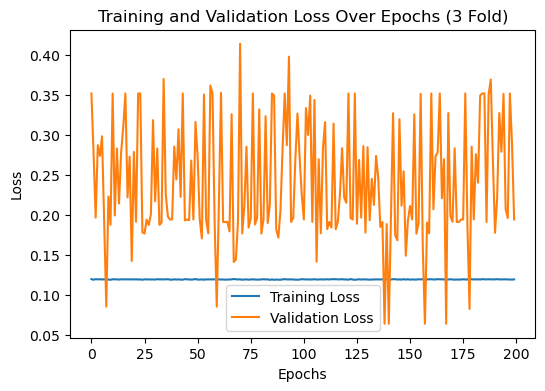

In [52]:
# k = 3
tr_epoch_loss, valid_epoch_loss = cal_loss_cv(linear3_tr_loss, linear3_valid_loss)
plot_losses(tr_epoch_loss, valid_epoch_loss, 3)

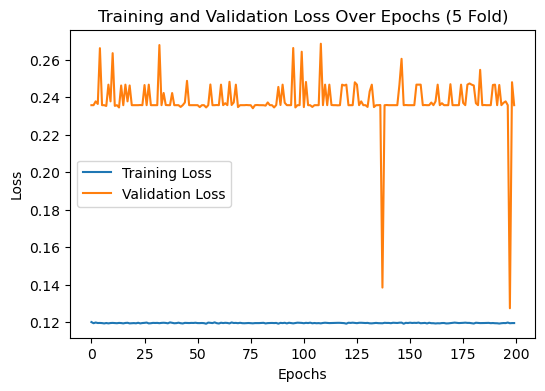

In [36]:
# k = 5
tr_epoch_loss, valid_epoch_loss = cal_loss_cv(linear5_tr_loss, linear5_valid_loss)
plot_losses(tr_epoch_loss, valid_epoch_loss, 5)

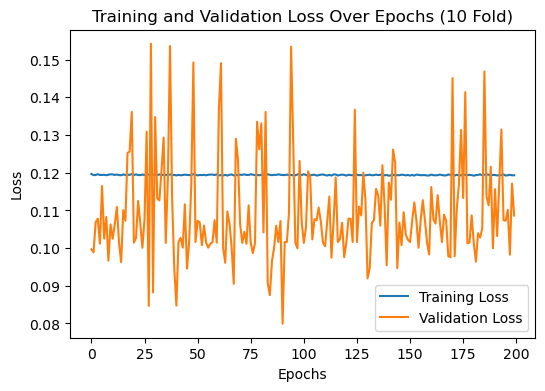

In [37]:
# k = 10
tr_epoch_loss, valid_epoch_loss = cal_loss_cv(linear10_tr_loss, linear10_valid_loss)
plot_losses(tr_epoch_loss, valid_epoch_loss, 10)

### 2. K-NN Classifier

In [38]:
%%time
knn = model.KnnClassifier(k = 5, metrics='euclidean')

knn_k3_acc, knn_k3_f1, knn_k3_acc_t, knn_k3_f1_t = cross_validation(knn, X_train_new, y_train, X_test_new, y_test, k=3)
knn_k5_acc, knn_k5_f1, knn_k5_acc_t, knn_k5_f1_t = cross_validation(knn, X_train_new, y_train, X_test_new, y_test, k=5)
knn_k10_acc, knn_k10_f1, knn_k10_acc_t, knn_k10_f1_t = cross_validation(knn, X_train_new, y_train, X_test_new, y_test, k=10)

CPU times: user 22min 47s, sys: 7.34 s, total: 22min 54s
Wall time: 22min 54s


### 3. Naïve Decision Tree Classifier

In [39]:
%%time
naiveDT = model.NaiveDTClassifier(measure = 'information gain')

naiveDT_k3_acc, naiveDT_k3_f1, naiveDT_k3_acc_t, naiveDT_k3_f1_t = cross_validation(naiveDT, X_train_new, y_train, X_test_new, y_test, k=3)
naiveDT_k5_acc, naiveDT_k5_f1, naiveDT_k5_acc_t, naiveDT_k5_f1_t = cross_validation(naiveDT, X_train_new, y_train, X_test_new, y_test, k=5)
naiveDT_k10_acc, naiveDT_k10_f1, naiveDT_k10_acc_t, naiveDT_k10_f1_t = cross_validation(naiveDT, X_train_new, y_train, X_test_new, y_test, k=10)

CPU times: user 2min 40s, sys: 673 ms, total: 2min 41s
Wall time: 2min 40s


### 4. Decision Tree with Pruning

In [40]:
%%time
PrunedDT = model.PrunedDTClassifier(measure = 'information gain', max_depth=10, min_samples_split=2)

PrunedDT_k3_acc, PrunedDT_k3_f1, PrunedDT_k3_acc_t, PrunedDT_k3_f1_t = cross_validation(PrunedDT, X_train_new, y_train, X_test_new, y_test, k=3)
PrunedDT_k5_acc, PrunedDT_k5_f1, PrunedDT_k5_acc_t, PrunedDT_k5_f1_t = cross_validation(PrunedDT, X_train_new, y_train, X_test_new, y_test, k=5)
PrunedDT_k10_acc, PrunedDT_k10_f1, PrunedDT_k10_acc_t, PrunedDT_k10_f1_t = cross_validation(PrunedDT, X_train_new, y_train, X_test_new, y_test, k=10)

CPU times: user 35.4 s, sys: 188 ms, total: 35.6 s
Wall time: 35.6 s


### Plot: k classifiers in 3-fold cross-validation (Validation)

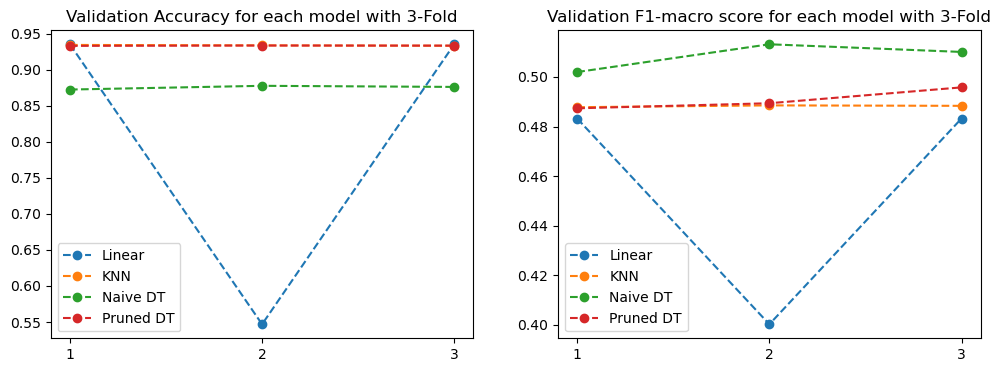

In [53]:
# 3 fold validaion
plt.figure(figsize=(12, 4))
x = list(range(1, 3+1))
plt.subplot(1,2,1)
plt.plot(x, linear3_acc, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k3_acc, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k3_acc, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k3_acc, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation Accuracy for each model with 3-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear3_f1, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k3_f1, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k3_f1, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k3_f1, label = 'Pruned DT', marker='o', linestyle='dashed')

plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation F1-macro score for each model with 3-Fold")

plt.savefig(f'figures/3fold_valid.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot: k classifiers in 3-fold cross-validation (Test)

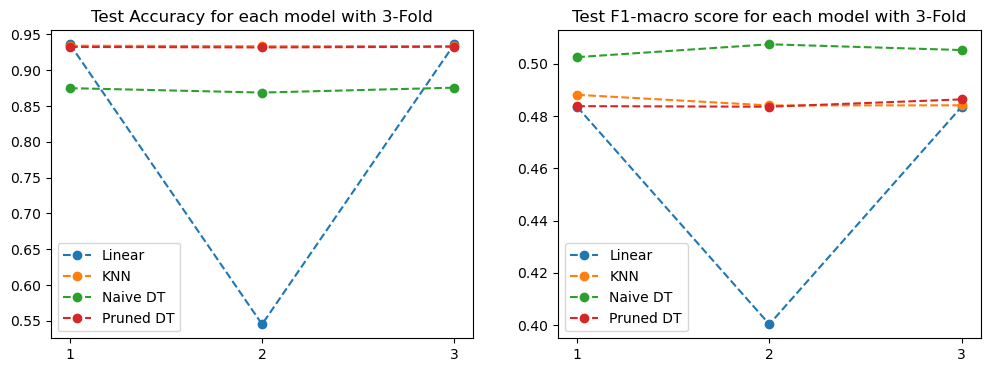

In [54]:
# 3 fold test
plt.figure(figsize=(12, 4))
x = list(range(1, 3+1))
plt.subplot(1,2,1)
plt.plot(x, linear3_acc_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k3_acc_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k3_acc_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k3_acc_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test Accuracy for each model with 3-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear3_f1_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k3_f1_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k3_f1_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k3_f1_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test F1-macro score for each model with 3-Fold")

plt.savefig(f'figures/3fold_test.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot: k classifiers in 5-fold cross-validation (Validation)

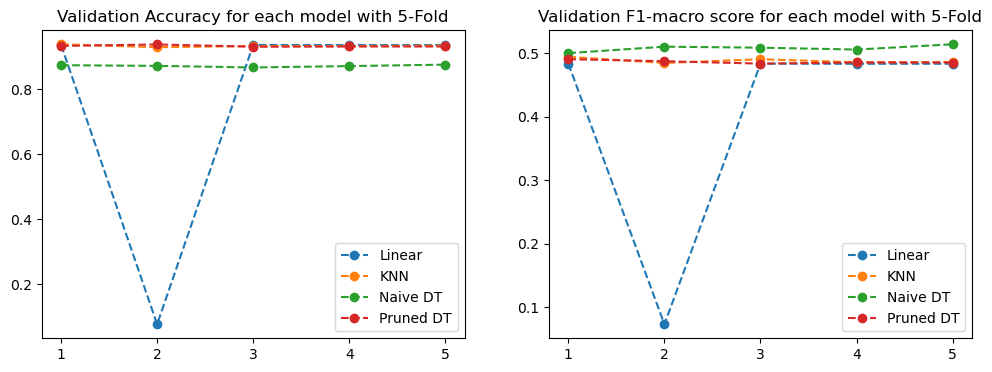

In [55]:
# 5 fold validaion
plt.figure(figsize=(12, 4))
x = list(range(1, 5+1))
plt.subplot(1,2,1)
plt.plot(x, linear5_acc, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k5_acc, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k5_acc, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k5_acc, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation Accuracy for each model with 5-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear5_f1, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k5_f1, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k5_f1, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k5_f1, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation F1-macro score for each model with 5-Fold")

plt.savefig(f'figures/5fold_valid.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot: k classifiers in 5-fold cross-validation (Test)

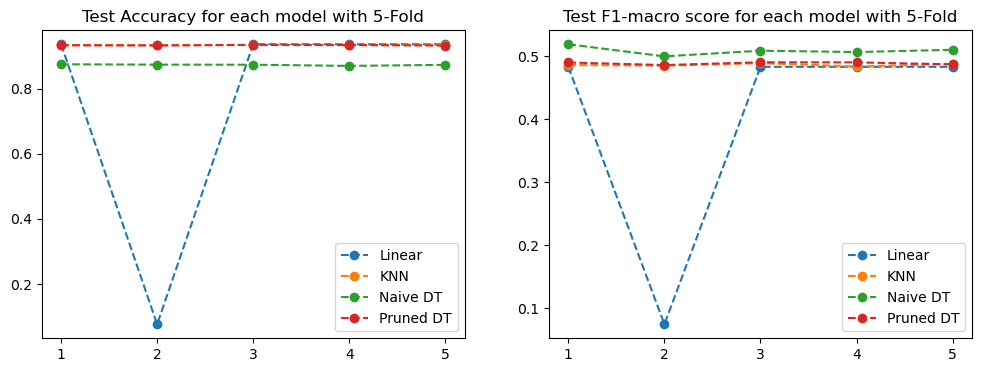

In [56]:
# 5 fold test
plt.figure(figsize=(12, 4))
x = list(range(1, 5+1))
plt.subplot(1,2,1)
plt.plot(x, linear5_acc_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k5_acc_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k5_acc_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k5_acc_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test Accuracy for each model with 5-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear5_f1_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k5_f1_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k5_f1_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k5_f1_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test F1-macro score for each model with 5-Fold")

plt.savefig(f'figures/5fold_test.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot: k classifiers in 10-fold cross-validation (Validation)

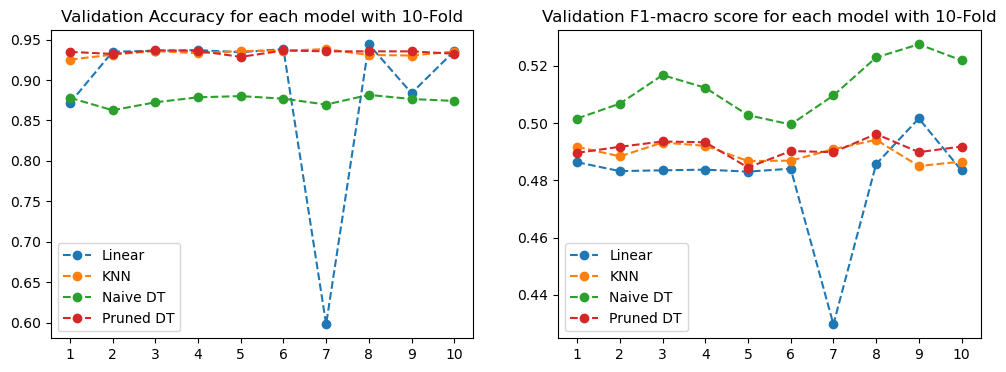

In [57]:
# 10 fold validaion
plt.figure(figsize=(12, 4))
x = list(range(1, 10+1))
plt.subplot(1,2,1)
plt.plot(x, linear10_acc, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k10_acc, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k10_acc, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k10_acc, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation Accuracy for each model with 10-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear10_f1, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k10_f1, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k10_f1, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k10_f1, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Validation F1-macro score for each model with 10-Fold")

plt.savefig(f'figures/10fold_valid.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot: k classifiers in 10-fold cross-validation (Test)

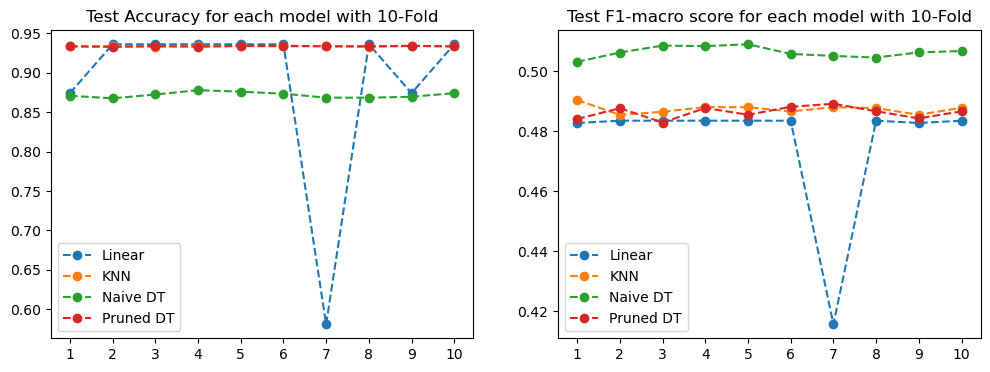

In [58]:
# 10 fold test
plt.figure(figsize=(12, 4))
x = list(range(1, 10+1))
plt.subplot(1,2,1)
plt.plot(x, linear10_acc_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k10_acc_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k10_acc_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k10_acc_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test Accuracy for each model with 10-Fold")

plt.subplot(1,2,2)
plt.plot(x, linear10_f1_t, label = 'Linear', marker='o', linestyle='dashed')
plt.plot(x, knn_k10_f1_t, label = 'KNN', marker='o', linestyle='dashed')
plt.plot(x, naiveDT_k10_f1_t, label = 'Naive DT', marker='o', linestyle='dashed')
plt.plot(x, PrunedDT_k10_f1_t, label = 'Pruned DT', marker='o', linestyle='dashed')
plt.xticks(range(1, len(x) + 1))
plt.legend()
plt.title("Test F1-macro score for each model with 10-Fold")

plt.savefig(f'figures/10fold_test.png', dpi=300, bbox_inches='tight')

plt.show()